In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
df = pd.read_csv('insurance.csv')            #Loading dataset in df
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#There are three categorical features: sex, smoker, region

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
#No missing values

In [9]:
df.describe()               #Statistical measures of data

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\mohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


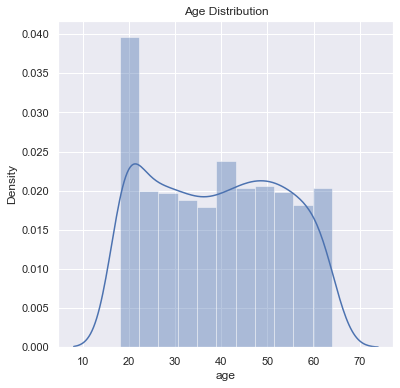

In [12]:
#Distribution of age
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df.age)
plt.title('Age Distribution')
plt.show()

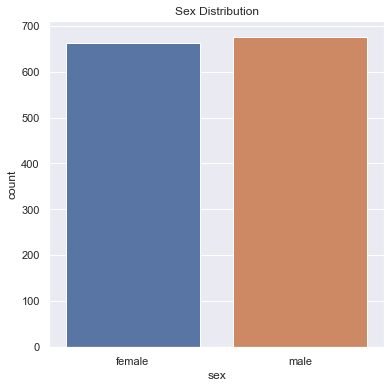

In [25]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'sex', data = df)
plt.title('Sex Distribution')
plt.show()

In [17]:
#Distribution of sex is somewhat equal for both the genders.

In [20]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


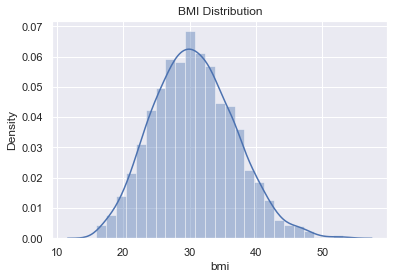

In [22]:
sns.distplot(df.bmi)
plt.title('BMI Distribution')
plt.show()

In [24]:
#BMI is normally distributed
#Normal BMI range --> 18.5 to 24.9
#From the distribution lot of people are overweight

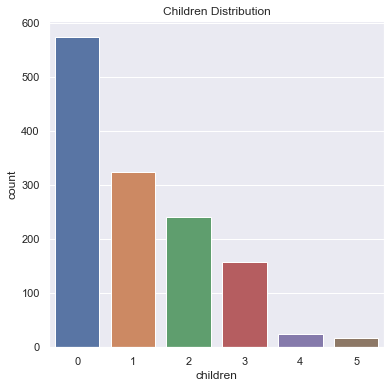

In [26]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'children', data = df)
plt.title('Children Distribution')
plt.show()

In [27]:
df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

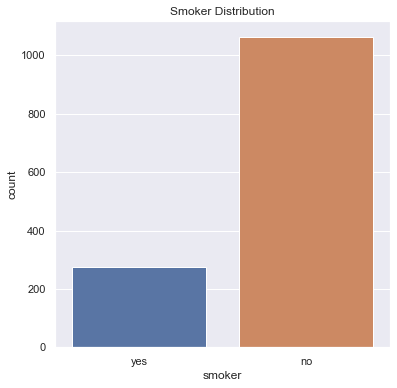

In [28]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'smoker', data = df)
plt.title('Smoker Distribution')
plt.show()

In [29]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

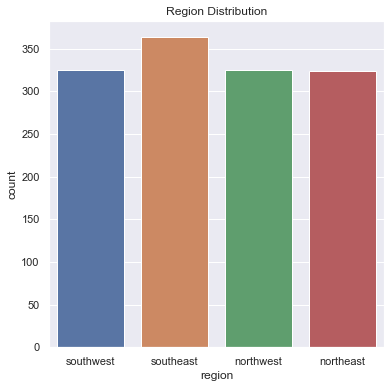

In [30]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'region', data = df)
plt.title('Region Distribution')
plt.show()

In [31]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


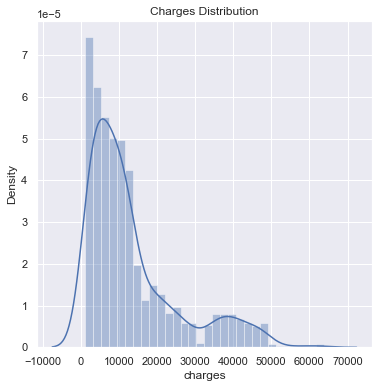

In [33]:
plt.figure(figsize=(6,6))
sns.distplot(df.charges)
plt.title('Charges Distribution')
plt.show()

In [38]:
a_c = df[['age', 'charges']].groupby('age').mean().reset_index()

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='age', ylabel='charges'>

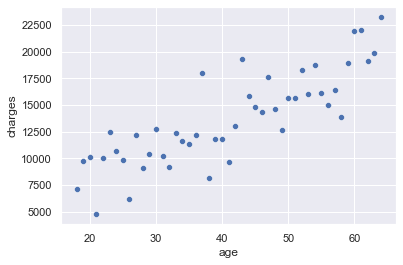

In [39]:
sns.scatterplot(a_c['age'], a_c['charges'])

In [41]:
df[['sex', 'charges']].groupby('sex').mean()

,charges
sex,
female,12569.578844
male,13956.751178


In [45]:
b_c = df[['bmi', 'charges']].groupby('bmi').mean().reset_index()

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='bmi', ylabel='charges'>

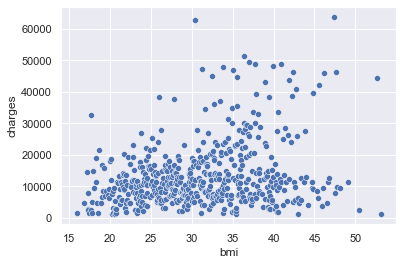

In [46]:
sns.scatterplot(b_c['bmi'], b_c['charges'])

In [48]:
df[['children', 'charges']].groupby('children').mean().reset_index()

,children,charges
0,0,12365.975602
1,1,12731.171832
2,2,15073.563734
3,3,15355.318367
4,4,13850.656311
5,5,8786.035247


In [49]:
df[['region', 'charges']].groupby('region').mean().reset_index()

,region,charges
0,northeast,13406.384516
1,northwest,12417.575374
2,southeast,14735.411438
3,southwest,12346.937377


In [50]:
#In Southeast region insurance cost is highest

In [51]:
df[['smoker', 'charges']].groupby('smoker').mean().reset_index()

,smoker,charges
0,no,8434.268298
1,yes,32050.231832


In [52]:
#Those who smoke pays high amount for their insurance

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='age', ylabel='bmi'>

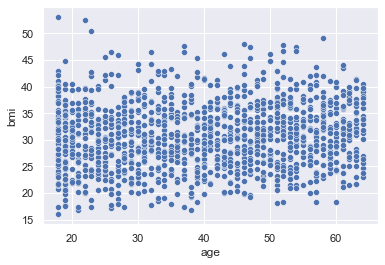

In [54]:
sns.scatterplot(df.age, df.bmi)

In [55]:
df.replace({'sex':{'male':0, 'female':1}}, inplace=True)

In [56]:
df.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

In [59]:
df = pd.get_dummies(df, columns=['region'], drop_first=True)

In [61]:
df.shape

(1338, 9)

In [90]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
a = sc.fit_transform(df[['age']])
b = sc.fit_transform(df[['bmi']])

df['age'] = a
df['bmi'] = b

In [91]:
X = df.drop(columns='charges', axis = 1)
Y = df.charges

In [92]:
X

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,0.021739,1,0.321227,0,0,0,0,1
1,0.000000,0,0.479150,1,1,0,1,0
2,0.217391,0,0.458434,3,1,0,1,0
3,0.326087,0,0.181464,0,1,1,0,0
4,0.304348,0,0.347592,0,1,1,0,0
...,...,...,...,...,...,...,...,...
1333,0.695652,0,0.403820,3,1,1,0,0
1334,0.000000,1,0.429379,0,1,0,0,0
1335,0.000000,1,0.562012,0,1,0,1,0
1336,0.065217,1,0.264730,0,1,0,0,1


In [93]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [94]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=32)

In [95]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 8) (1070, 8) (268, 8)


In [96]:
reg_lr = LinearRegression()

In [97]:
reg_lr.fit(X_train, Y_train)
pred_train = reg_lr.predict(X_train)

from sklearn.metrics import r2_score
r2_score(Y_train, pred_train)

0.7436951911655163

In [98]:
pred_test = reg_lr.predict(X_test)
r2_score(Y_test, pred_test)

0.781705116269015

In [99]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV 

ridge = Ridge()

params = {'alpha':[1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regressor = GridSearchCV(ridge, params, scoring = 'neg_mean_squared_error', cv = 5)
ridge_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20]},
             scoring='neg_mean_squared_error')

In [100]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1}
-39335870.16431604


In [101]:
pred_train_r = ridge_regressor.predict(X_train)
pred_test_r = ridge_regressor.predict(X_test)
print('Accuracy train:', r2_score(pred_train_r, Y_train))
print('Accuracy test:', r2_score(pred_test_r, Y_test))

Accuracy train: 0.6502682316700164
Accuracy test: 0.7037704727808397


In [102]:
from sklearn.linear_model import Lasso

lasso = Lasso()

params = {'alpha':[1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regressor = GridSearchCV(lasso, params, scoring = 'neg_mean_squared_error', cv = 5)
lasso_regressor.fit(X_train, Y_train)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\mohit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.709e+10, tolerance: 1.308e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.555e+10, tolerance: 1.283e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.540e+10, toleranc

{'alpha': 20}
-39322276.88238307


In [103]:
Y_pred = lasso_regressor.predict(X_test)
from sklearn.metrics import r2_score

r2score = r2_score(Y_pred, Y_test)
r2score

0.7036435552130806

In [105]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, Y_train)

pred_train_rf = rf_reg.predict(X_train)
print('Accuracy(Train Data) :', r2_score(Y_train, pred_train_rf))
pred_test_rf = rf_reg.predict(X_test)
print('Accuracy(Test Data) :', r2_score(Y_test, pred_test_rf))

Accuracy(Train Data) : 0.9775008537252722
Accuracy(Test Data) : 0.8324770152786493


In [106]:
#Accuracy is good but overfitting is taking place

In [107]:
#Tuning the model

from sklearn.model_selection import GridSearchCV  

parameters = {'n_estimators':[150,200,250,300], 'max_depth':[15,20,25]}        #n_estimators is no. of trees and max_depth max. depth of the trees in ou model
forest = RandomForestRegressor()
reg = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=5)

In [111]:
reg.fit(X, Y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25],
                         'n_estimators': [150, 200, 250, 300]})

In [112]:
print(reg.best_params_)
print(reg.best_score_)

{'max_depth': 15, 'n_estimators': 250}
0.8386449074944785


In [116]:
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE

In [115]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.  Downloading xgboost-1.7.3-py3-none-win_amd64.whl (89.1 MB)



In [117]:
xgbr = xg.XGBRegressor()
xgbr.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [121]:
pred_train_xgbr = xgbr.predict(X_train)
print('R2_score Train:', r2_score(pred_train_xgbr, Y_train))
print('MSE Train:', MSE(pred_train_xgbr, Y_train))
pred_test_xgbr = xgbr.predict(X_test)
print('R2_score Test:', r2_score(pred_test_xgbr, Y_test))
print('MSE Test:', MSE(pred_test_xgbr, Y_test))

R2_score Train: 0.9957034054476621
MSE Train: 623863.9072419144
R2_score Test: 0.7865152532780938
MSE Test: 28147648.24621782


In [122]:
parameters = {'n_estimators':[150,200,250,300], 'max_depth':[15,20,25]}       
xgbr = xg.XGBRegressor()
xgreg = GridSearchCV(estimator=xgbr, param_grid=parameters, n_jobs=-1, cv=5) 

In [124]:
xgreg.fit(X_train, Y_train)

print(MSE(xgreg.predict(X_train), Y_train))
print(MSE(xgreg.predict(X_test), Y_test))

73028.23142113714
32542916.807421207


In [125]:
xgreg.best_score_

0.8096636495915528

In [126]:
xgreg.best_params_

{'max_depth': 15, 'n_estimators': 150}

In [128]:
#RandomForestRegressor performs the best out of all the tested model with score of 84%